In [1]:
# First let's import the packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
pd.options.mode.chained_assignment = None



# Read in the data
df = pd.read_csv(r'songs.csv')

In [2]:
df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [3]:
# Lets see if we have any missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

artist - 0%
song - 0%
duration_ms - 0%
explicit - 0%
year - 0%
popularity - 0%
danceability - 0%
energy - 0%
key - 0%
loudness - 0%
mode - 0%
speechiness - 0%
acousticness - 0%
instrumentalness - 0%
liveness - 0%
valence - 0%
tempo - 0%
genre - 0%


In [4]:
# Data Types

df.dtypes

artist               object
song                 object
duration_ms           int64
explicit               bool
year                  int64
popularity            int64
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
genre                object
dtype: object

<AxesSubplot:>

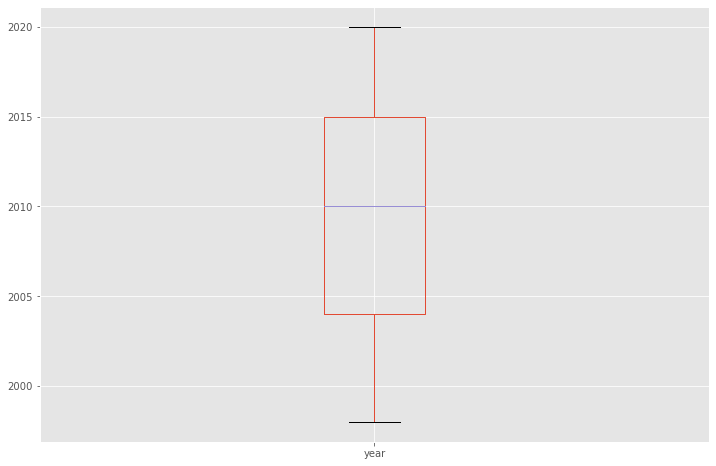

In [5]:
# Are there any Outliers?

df.boxplot(column=['year'])

In [6]:
# Drop any duplicates form our data
df.drop_duplicates()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop
1996,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop
1997,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,"hip hop, country"
1998,Sam Smith,Dancing With A Stranger (with Normani),171029,False,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop


In [7]:
# Obyrder our Data by year

df.sort_values(by=['year'], inplace=False, ascending=False)

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
1991,NSG,Options,240081,True,2020,57,0.836,0.621,1,-4.684,0,0.0894,0.38900,0.000092,0.1040,0.762,101.993,"World/Traditional, hip hop"
568,Will Smith,Switch,197666,False,2020,34,0.873,0.900,5,-4.325,0,0.1800,0.01070,0.000502,0.5560,0.478,102.516,"hip hop, pop"
308,t.A.T.u.,All The Things She Said,214440,True,2020,39,0.527,0.834,5,-5.767,0,0.0474,0.04110,0.005990,0.1050,0.381,179.920,pop
1999,Post Malone,Circles,215280,False,2019,85,0.695,0.762,0,-3.497,1,0.0395,0.19200,0.002440,0.0863,0.553,120.042,hip hop
217,Aaliyah,Rock The Boat,275026,False,2019,0,0.641,0.720,5,-5.209,1,0.0336,0.06880,0.002860,0.1930,0.418,92.988,"hip hop, pop, R&B"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30,DMX,Party Up,268866,True,1999,71,0.510,0.931,11,-3.302,1,0.3470,0.07380,0.000000,0.5000,0.530,201.936,"hip hop, pop"
64,Christina Aguilera,I Turn to You,273706,False,1999,61,0.599,0.470,1,-8.356,1,0.0376,0.38000,0.000000,0.1110,0.298,127.177,pop
410,Anastacia,Sick and Tired,212266,False,1999,56,0.598,0.868,0,-4.552,1,0.0373,0.00908,0.000000,0.2790,0.470,99.848,pop
88,Marc Anthony,You Sang To Me,347106,False,1999,56,0.578,0.894,10,-5.420,1,0.0296,0.01030,0.000003,0.2160,0.741,165.980,"pop, latin"


<AxesSubplot:xlabel='duration_ms', ylabel='year'>

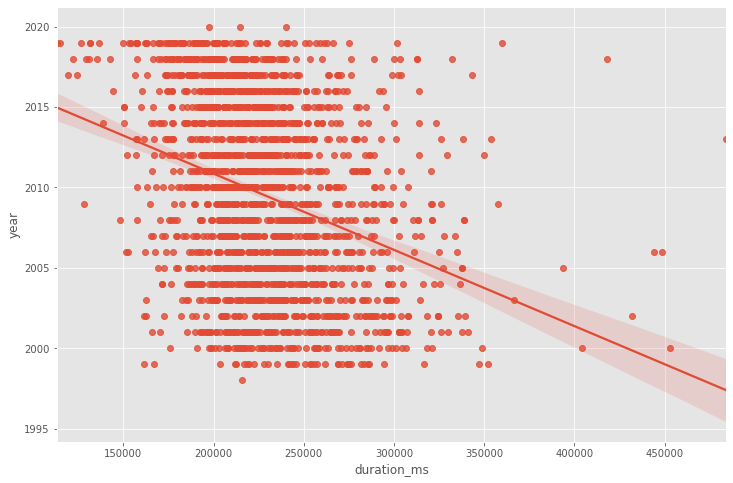

In [9]:
# Lets illustrate our data correlations
sns.regplot(x="duration_ms", y="year", data=df)

<AxesSubplot:xlabel='popularity', ylabel='duration_ms'>

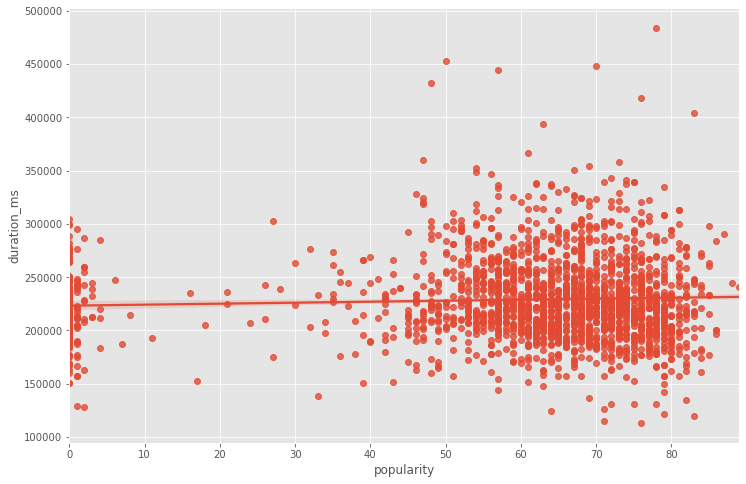

In [11]:
sns.regplot(x="popularity", y="duration_ms", data=df)

In [12]:
# Correlation matrix between all numeric columns
df.corr(method ='pearson')

,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
duration_ms,1.000000,0.123595,-0.316534,0.050617,-0.060057,-0.078763,-0.002560,-0.079912,-0.003848,0.066998,0.010923,-0.004208,0.024941,-0.116870,-0.028603
explicit,0.123595,1.000000,0.078477,0.046605,0.248845,-0.162462,0.003320,-0.089829,0.049576,0.417343,-0.033523,-0.082522,0.008884,-0.045455,0.013221
year,-0.316534,0.078477,1.000000,-0.003825,0.033532,-0.108644,0.007380,0.017479,-0.007358,0.001111,0.033809,-0.050265,-0.027037,-0.209365,0.076867
popularity,0.050617,0.046605,-0.003825,1.000000,-0.003546,-0.014021,0.014823,0.030632,-0.021353,0.021162,0.024619,-0.048059,-0.009856,-0.016142,0.014288
danceability,-0.060057,0.248845,0.033532,-0.003546,1.000000,-0.104038,0.032731,-0.033315,-0.067528,0.145590,-0.065429,0.023207,-0.126413,0.403178,-0.173418
energy,-0.078763,-0.162462,-0.108644,-0.014021,-0.104038,1.000000,-0.003446,0.651016,-0.040651,-0.057018,-0.445469,0.037861,0.156761,0.334474,0.153719
key,-0.002560,0.003320,0.007380,0.014823,0.032731,-0.003446,1.000000,-0.007474,-0.153182,0.007147,0.002365,-0.008173,-0.033071,0.036977,-0.001431
loudness,-0.079912,-0.089829,0.017479,0.030632,-0.033315,0.651016,-0.007474,1.000000,-0.028133,-0.076388,-0.310039,-0.104925,0.102159,0.232150,0.080709
mode,-0.003848,0.049576,-0.007358,-0.021353,-0.067528,-0.040651,-0.153182,-0.028133,1.000000,-0.000077,0.005744,-0.038613,0.025439,-0.074681,0.048434
speechiness,0.066998,0.417343,0.001111,0.021162,0.145590,-0.057018,0.007147,-0.076388,-0.000077,1.000000,0.000394,-0.062954,0.061172,0.073605,0.057747


In [13]:
df.corr(method ='kendall')

,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
duration_ms,1.000000,0.101157,-0.233019,-0.025415,-0.035057,-0.079338,-0.004149,-0.074167,-0.002249,0.004872,0.027796,-0.002912,-0.005871,-0.083524,-0.034561
explicit,0.101157,1.000000,0.066804,0.049809,0.201320,-0.145469,0.005376,-0.081397,0.049576,0.319471,0.037421,-0.134186,0.003285,-0.036497,-0.004947
year,-0.233019,0.066804,1.000000,0.144113,0.023070,-0.083818,0.005706,0.009423,-0.006249,0.036332,0.033974,-0.052086,0.011265,-0.145579,0.053543
popularity,-0.025415,0.049809,0.144113,1.000000,-0.004217,-0.041729,0.001099,0.026244,-0.002509,0.007819,0.032898,-0.046578,-0.009192,-0.049267,0.012261
danceability,-0.035057,0.201320,0.023070,-0.004217,1.000000,-0.107341,0.022728,-0.037235,-0.056687,0.160511,0.057944,0.034390,-0.102588,0.273459,-0.088964
energy,-0.079338,-0.145469,-0.083818,-0.041729,-0.107341,1.000000,0.001437,0.431559,-0.028904,0.026905,-0.243915,0.080568,0.084141,0.207381,0.117873
key,-0.004149,0.005376,0.005706,0.001099,0.022728,0.001437,1.000000,-0.008543,-0.123926,0.023040,0.016028,0.021649,-0.023725,0.020721,0.005573
loudness,-0.074167,-0.081397,0.009423,0.026244,-0.037235,0.431559,-0.008543,1.000000,-0.019150,-0.002037,-0.126829,-0.069418,0.040215,0.143381,0.053938
mode,-0.002249,0.049576,-0.006249,-0.002509,-0.056687,-0.028904,-0.123926,-0.019150,1.000000,-0.041023,-0.021553,-0.020642,0.038550,-0.060843,0.039099
speechiness,0.004872,0.319471,0.036332,0.007819,0.160511,0.026905,0.023040,-0.002037,-0.041023,1.000000,0.039838,-0.114913,0.020135,0.091706,0.010724


In [14]:
df.corr(method ='spearman')

,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
duration_ms,1.000000,0.123853,-0.332545,-0.036624,-0.050835,-0.116131,-0.006243,-0.107821,-0.002753,0.010855,0.040998,-0.004045,-0.008438,-0.124449,-0.050757
explicit,0.123853,1.000000,0.079896,0.060188,0.246249,-0.177943,0.006307,-0.099656,0.049576,0.390919,0.045805,-0.150534,0.004017,-0.044660,-0.006058
year,-0.332545,0.079896,1.000000,0.203541,0.031418,-0.120505,0.007488,0.013993,-0.007474,0.049544,0.046944,-0.070034,0.018414,-0.212127,0.083713
popularity,-0.036624,0.060188,0.203541,1.000000,-0.006678,-0.061081,0.001248,0.038371,-0.003032,0.012044,0.048877,-0.062793,-0.014573,-0.072173,0.017398
danceability,-0.050835,0.246249,0.031418,-0.006678,1.000000,-0.157172,0.032128,-0.054853,-0.069337,0.236349,0.085826,0.048054,-0.153961,0.399797,-0.132686
energy,-0.116131,-0.177943,-0.120505,-0.061081,-0.157172,1.000000,0.002355,0.602048,-0.035357,0.040516,-0.354489,0.110342,0.126061,0.306729,0.173741
key,-0.006243,0.006307,0.007488,0.001248,0.032128,0.002355,1.000000,-0.011901,-0.145390,0.032787,0.023753,0.028333,-0.034082,0.029979,0.007860
loudness,-0.107821,-0.099656,0.013993,0.038371,-0.054853,0.602048,-0.011901,1.000000,-0.023445,-0.004599,-0.189550,-0.095125,0.060584,0.213971,0.081155
mode,-0.002753,0.049576,-0.007474,-0.003032,-0.069337,-0.035357,-0.145390,-0.023445,1.000000,-0.050197,-0.026382,-0.023157,0.047148,-0.074452,0.047872
speechiness,0.010855,0.390919,0.049544,0.012044,0.236349,0.040516,0.032787,-0.004599,-0.050197,1.000000,0.056487,-0.156214,0.030203,0.139371,0.015851


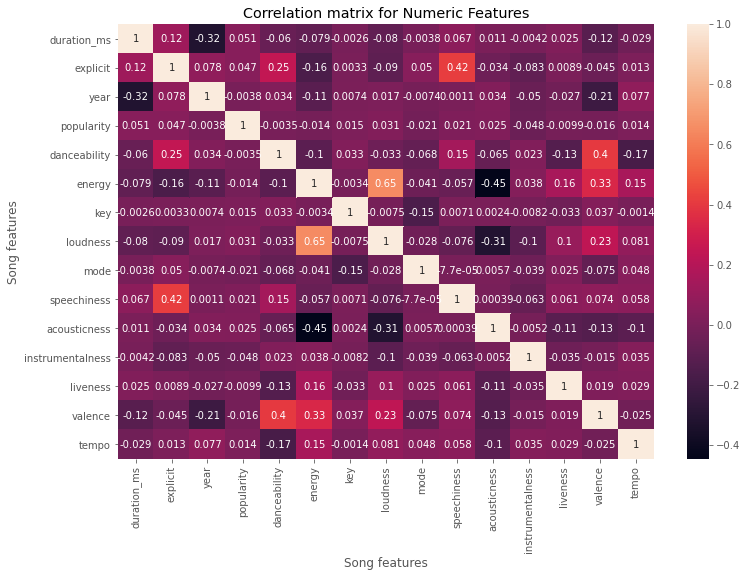

In [15]:
# Illustrate correlation matrix

correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Song features")

plt.ylabel("Song features")

plt.show()

In [16]:
# Using factorize - this assigns a random numeric value for each unique categorical value

df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
artist,1.000000,0.831895,0.821140,0.068012,0.317359,0.030744,0.278373,0.300396,-0.004564,0.746268,0.022809,0.392218,0.540655,0.293277,0.263154,0.409617,0.826118,0.189435
song,0.831895,1.000000,0.923858,0.093933,0.375880,0.004799,0.307866,0.333282,-0.019360,0.854462,0.015137,0.476130,0.610764,0.303402,0.338284,0.461129,0.933279,0.128453
duration_ms,0.821140,0.923858,1.000000,0.091228,0.357237,0.008735,0.301650,0.335386,-0.019125,0.832316,0.018706,0.451478,0.603359,0.311804,0.329832,0.451176,0.916109,0.133837
explicit,0.068012,0.093933,0.091228,1.000000,-0.019516,-0.013742,0.031503,0.070537,-0.063044,0.083717,0.049576,0.092385,0.029793,-0.059671,0.060162,0.058495,0.093962,-0.036987
year,0.317359,0.375880,0.357237,-0.019516,1.000000,0.039052,0.222705,0.217291,-0.013074,0.341584,0.012833,0.270405,0.341981,0.143653,0.272739,0.253221,0.374841,0.053699
popularity,0.030744,0.004799,0.008735,-0.013742,0.039052,1.000000,0.009902,0.058548,-0.004287,0.036702,0.049761,-0.016175,0.061586,0.016559,0.012927,0.051749,0.002354,0.045876
danceability,0.278373,0.307866,0.301650,0.031503,0.222705,0.009902,1.000000,0.139483,0.015598,0.281567,0.004791,0.200546,0.237077,0.128469,0.126929,0.230408,0.311425,0.024928
energy,0.300396,0.333282,0.335386,0.070537,0.217291,0.058548,0.139483,1.000000,-0.011584,0.317026,0.042091,0.189361,0.287006,0.113258,0.183244,0.263796,0.323052,0.009854
key,-0.004564,-0.019360,-0.019125,-0.063044,-0.013074,-0.004287,0.015598,-0.011584,1.000000,0.000684,-0.202580,-0.018199,-0.007617,0.014238,0.003097,-0.004859,-0.018634,0.018422
loudness,0.746268,0.854462,0.832316,0.083717,0.341584,0.036702,0.281567,0.317026,0.000684,1.000000,0.012201,0.429587,0.566237,0.275103,0.312753,0.420290,0.841221,0.128080


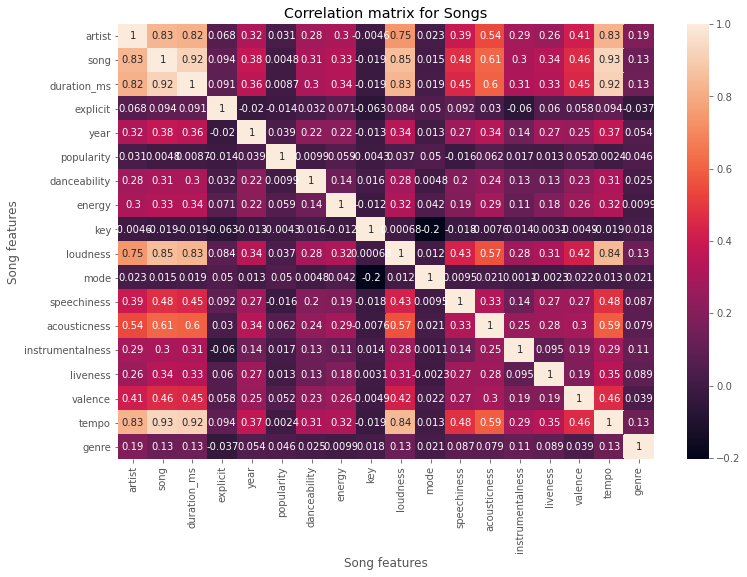

In [18]:

correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Songs")

plt.xlabel("Song features")

plt.ylabel("Song features")

plt.show()

In [19]:
correlation_mat = df.apply(lambda x: x.factorize()[0]).corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

artist  artist              1.000000
        song                0.831895
        duration_ms         0.821140
        explicit            0.068012
        year                0.317359
                              ...   
genre   instrumentalness    0.112197
        liveness            0.088904
        valence             0.039066
        tempo               0.134866
        genre               1.000000
Length: 324, dtype: float64

In [20]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

sorted_pairs

mode              key                -0.202580
key               mode               -0.202580
                  explicit           -0.063044
explicit          key                -0.063044
                  instrumentalness   -0.059671
                                        ...   
acousticness      acousticness        1.000000
instrumentalness  instrumentalness    1.000000
liveness          liveness            1.000000
key               key                 1.000000
genre             genre               1.000000
Length: 324, dtype: float64

In [21]:
# High correlation (> 0.5)

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

strong_pairs

artist            acousticness        0.540655
acousticness      artist              0.540655
loudness          acousticness        0.566237
acousticness      loudness            0.566237
tempo             acousticness        0.594731
acousticness      tempo               0.594731
                  duration_ms         0.603359
duration_ms       acousticness        0.603359
song              acousticness        0.610764
acousticness      song                0.610764
loudness          artist              0.746268
artist            loudness            0.746268
duration_ms       artist              0.821140
artist            duration_ms         0.821140
tempo             artist              0.826118
artist            tempo               0.826118
                  song                0.831895
song              artist              0.831895
duration_ms       loudness            0.832316
loudness          duration_ms         0.832316
                  tempo               0.841221
tempo        

In [24]:
# Looking at the top 15 compaies by gross revenue

Sum = df.groupby('artist')[["energy"]].sum()

SumSorted = Sum.sort_values('energy', ascending = False)[:10]

SumSorted = SumSorted['energy'].astype('int64') 

SumSorted

artist
Calvin Harris     17
Rihanna           16
Eminem            16
David Guetta      14
Britney Spears    14
Drake             13
Katy Perry        12
Kanye West        12
P!nk              11
Chris Brown       11
Name: energy, dtype: int64

In [26]:
df.groupby(['artist', 'year'])[["energy"]].sum()[:10]

energy
artist       year        
*NSYNC       2000   1.802
             2001   1.210
112          2001   1.230
2 Chainz     2013   0.902
             2017   0.502
21 Savage    2017   0.347
             2018   0.636
2Pac         2001   0.706
             2004   0.614
3 Doors Down 2000   0.865

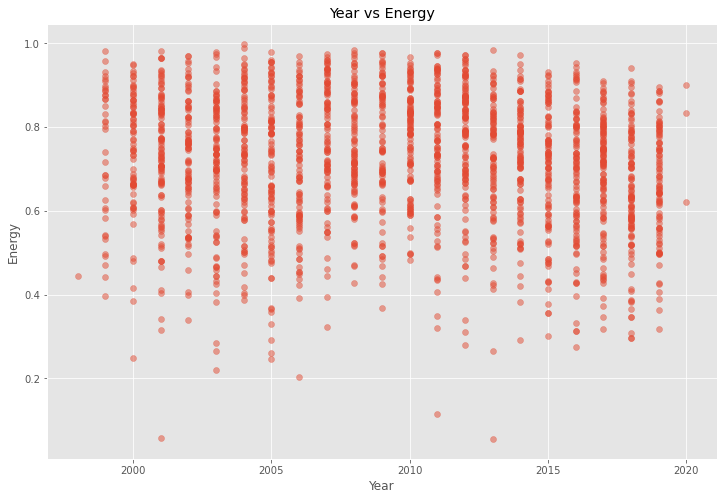

In [27]:
plt.scatter(x=df['year'], y=df['energy'], alpha=0.5)
plt.title('Year vs Energy')
plt.xlabel('Year')
plt.ylabel('Energy')
plt.show()

C:\Users\O1819\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 85.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\O1819\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 54.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\O1819\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 27.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\O1819\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\O1819\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 50.0% of the points

<AxesSubplot:xlabel='popularity', ylabel='year'>

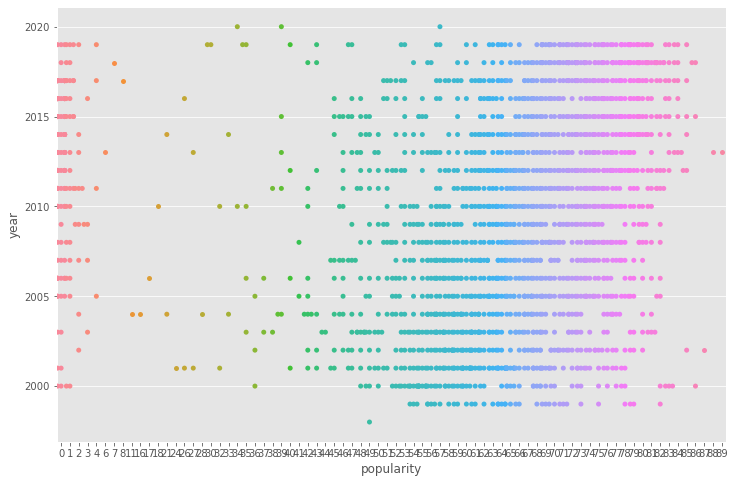

In [30]:
sns.swarmplot(x="popularity", y="year", data=df)